In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

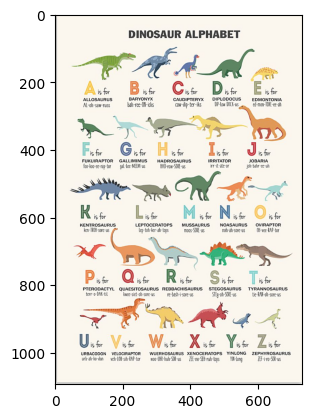

In [3]:
image = cv2.imread('images/Labs/I/abc.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

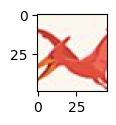

In [6]:
template = image[675:725, 70:115].copy()
plt.figure(figsize=(1, 1))
plt.imshow(template)
plt.show()

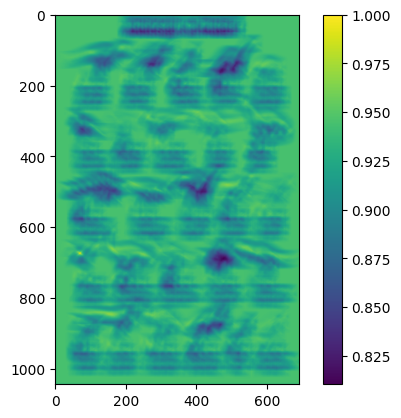

In [8]:
match = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
plt.imshow(match)#, cmap='hot')
plt.colorbar()
plt.show()

In [12]:
np.where(match == match.max()) # координаты "мэтча"

(array([675]), array([70]))

Можно сравнивать изображения используя признаки объектов вместо информации о цвете пикселей. Для этого нам понадобится нейронная сеть, а точнее та её часть, которая используется (обучена) для извлечения признаков

Схема использования нейросети для извлечения признаков и построения тепловой карты выглядит следующим образом:

<img src="images/Labs/I/get_heatmap.png" alt="heat map" height=30% width=30%>

In [ ]:
# define model
model = torchvision.models.resnet18(pretrained=True)
layer4_features = None
avgpool_emb = None

# define hooks
def get_features(module, inputs, output):
    global layer4_features
    layer4_features = output

def get_embedding(module, inputs, output):
    global avgpool_emb
    avgpool_emb = output

model.layer4.register_forward_hook(get_features)
model.avgpool.register_forward_hook(get_embedding)
model.eval()

### Задание: Найти динозавра
1) Выбрать одинаковых динозавров с разных изображений
2) Получить признаки изображения с помощью ResNet. (Использовать output с layer4)
3) Получить признаки одного динозавра с соседнего изображения (использовать output с avgpool)
4) Сравнивая признаки ("косинусное" расстояние) найти динозавра на изображении. Построить тепловую карту